In [5]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pyaudio
p = pyaudio.PyAudio()

FORMAT = pyaudio.paInt16
RATE = 22050
CHUNK = 1024
CHANNELS = 1

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

RECORD_SECONDS = 5
frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
  data = stream.read(CHUNK)
  frames.append(data)

In [32]:
from rec import Rec
import torch
model = Rec()
model.load_state_dict(torch.load('models/tinyvoice_1652467718_9.pt'))

<All keys matched successfully>

In [34]:
from rec import load_example, CHARSET
val = torch.tensor(load_example('data/LJ037-0171.wav'))
#imshow(torch.log10(val).T)
mguess = model(val[:, None])
#imshow(mguess.detach().numpy()[0])
print(mguess.shape)
print(mguess[:, 0, :].argmax(dim=1))
pp = ''.join([CHARSET[c-1] for c in mguess[:, 0, :].argmax(dim=1).cpu() if c != 0])
print(pp)

torch.Size([654, 1, 29])
tensor([ 0,  0, 21, 21,  9,  9,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  6,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  2,  0,
         0,  0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0, 10,  0,  0,  0,  0,
         0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 21, 10, 16, 16,  0, 15, 15, 15,  1,  0,  0,  2,  0,  0, 15, 15,  0,
         0,  0,  0,  0,  0,  0, 21, 21,  0,  0,  0,  6,  0,  0,  0,  0, 20, 20,
         0, 20,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0, 10,  0, 14,  0,  0,  0,
         0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,  0, 26,  0,
         0,  0,  0,  0,  0,  0, 16,  0,  0,  0,  7,  0,  0,  1, 21,  9,  6,  6,
         0,  0,  0,  0,  0,  1,  1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  4,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0, 19,
        19, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,

/tmp/ipykernel_2264096/1632337119.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val = torch.tensor(load_example('data/LJ037-0171.wav'))


In [1]:
import wave
import numpy as np

wavefile = wave.open("LJ037-0171.wav", "r")
length = wavefile.getnframes()
print(f"{length} frames")
wavedata = np.frombuffer(wavefile.readframes(length), np.int16)
print(len(wavedata))
print(wavedata[0:10])

167226 frames
167226
[-15 -14  -6  -2  -9  -4  -7  -9  -1   2]


torch.Size([1, 167226]) 22050
torch.Size([1, 80, 654])


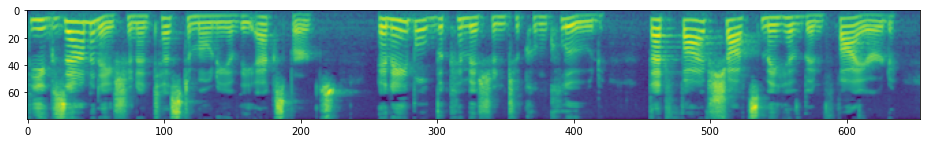

In [9]:
import torchaudio
waveform, sample_rate = torchaudio.load('data/LJ037-0171.wav', normalize=True)
print(waveform.shape, sample_rate)
transform = torchaudio.transforms.MelSpectrogram(sample_rate, n_fft=1024, win_length=1024, hop_length=256, n_mels=80)
mel_specgram = transform(waveform)
print(mel_specgram.shape)
figsize(16,16)
#imshow(mel_specgram[0])
imshow(np.log10(mel_specgram[0]))

In [15]:
from rec import train
train()

got metadata 12492


  0%|          | 0/12492 [00:00<?, ?it/s]

torch.Size([716, 2, 29]) torch.Size([2, 118]) [716, 716] [99, 118]
tensor([1980.8480, 1933.0178], grad_fn=<SWhereBackward0>)
torch.Size([588, 2, 29]) torch.Size([2, 75]) [588, 588] [75, 72]
tensor([1637.0857, 1638.6414], grad_fn=<SWhereBackward0>)


: 

: 

In [69]:
from rec import get_dataloader
x,y,xl,yl = next(iter(get_dataloader()))

x.shape, y.shape, xl, yl

got metadata 12492


(torch.Size([860, 32, 80]),
 torch.Size([32, 150]),
 [860,
  813,
  812,
  790,
  773,
  766,
  751,
  749,
  711,
  702,
  679,
  667,
  656,
  603,
  599,
  589,
  535,
  531,
  516,
  512,
  500,
  496,
  478,
  452,
  447,
  435,
  354,
  335,
  309,
  288,
  257,
  232],
 [131,
  138,
  136,
  147,
  134,
  145,
  116,
  122,
  121,
  136,
  117,
  131,
  130,
  124,
  116,
  97,
  80,
  102,
  87,
  79,
  91,
  90,
  88,
  77,
  83,
  60,
  77,
  49,
  58,
  54,
  39,
  42])

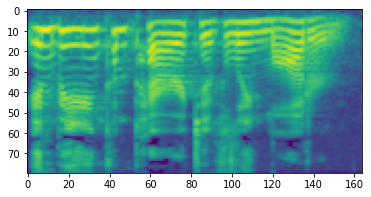

In [50]:
dset = LJSpeech()
imshow(dset[0][0][0])

In [44]:
from rec import LJSpeech
from tqdm.auto import trange

dset = LJSpeech()
print(len(dset))
mm = 0
nn = 0
nns = []
for i in trange(len(dset)):
  x,y = dset[i]
  mm = max(x.shape[2], mm)
  nn = max(y.shape[1], nn)
  nns.append(y.shape[1])
  print(x.shape, y.shape, mm, nn)

12492


  0%|          | 0/12492 [00:00<?, ?it/s]

torch.Size([1, 80, 164]) torch.Size([1, 30]) 164 30
torch.Size([1, 80, 443]) torch.Size([1, 89]) 443 89
torch.Size([1, 80, 699]) torch.Size([1, 143]) 699 143
torch.Size([1, 80, 490]) torch.Size([1, 74]) 699 143
torch.Size([1, 80, 723]) torch.Size([1, 94]) 723 143
torch.Size([1, 80, 154]) torch.Size([1, 25]) 723 143
torch.Size([1, 80, 651]) torch.Size([1, 104]) 723 143
torch.Size([1, 80, 760]) torch.Size([1, 115]) 760 143
torch.Size([1, 80, 389]) torch.Size([1, 73]) 760 143
torch.Size([1, 80, 710]) torch.Size([1, 108]) 760 143
torch.Size([1, 80, 223]) torch.Size([1, 43]) 760 143
torch.Size([1, 80, 454]) torch.Size([1, 79]) 760 143
torch.Size([1, 80, 605]) torch.Size([1, 137]) 760 143
torch.Size([1, 80, 645]) torch.Size([1, 124]) 760 143
torch.Size([1, 80, 553]) torch.Size([1, 108]) 760 143
torch.Size([1, 80, 403]) torch.Size([1, 62]) 760 143
torch.Size([1, 80, 742]) torch.Size([1, 126]) 760 143
torch.Size([1, 80, 608]) torch.Size([1, 109]) 760 143
torch.Size([1, 80, 728]) torch.Size([1,

KeyboardInterrupt: 

In [43]:
len([x[1] for x in dset.meta if len(x[1]) < 150]), len(dset.meta)

(12434, 13089)

In [43]:
import torchaudio
waveform, sample_rate = torchaudio.load('LJ037-0171.wav', normalize=True)
print(waveform.shape, sample_rate)
# from HiFi-GAN
transform = torchaudio.transforms.MelSpectrogram(sample_rate, n_fft=1024, win_length=1024, hop_length=256, n_mels=80)
mel_specgram = transform(waveform)
print(mel_specgram.shape)

torch.Size([1, 167226]) 22050
torch.Size([1, 80, 654])


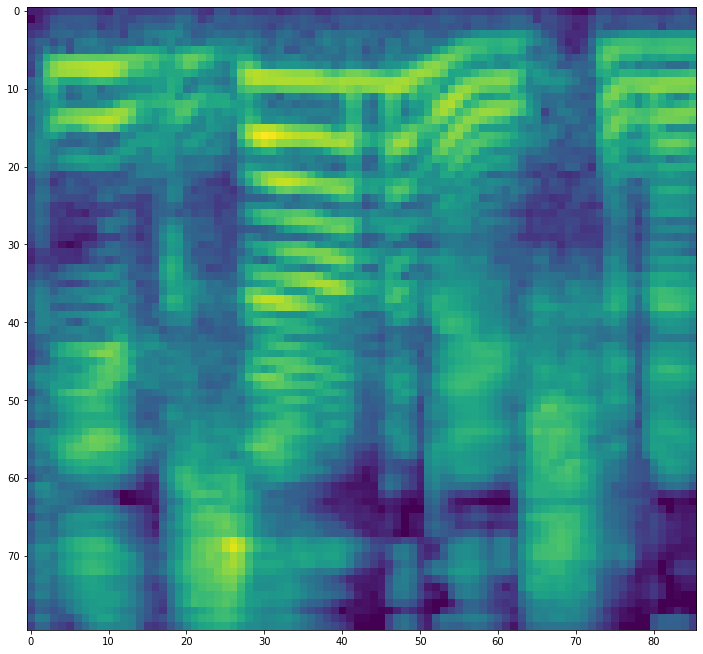

In [63]:
import librosa
figsize(12,12)
imshow(librosa.power_to_db(mel_specgram[0])[:, 0:86])

In [62]:
167226/22050, 167226/256, 22050/256

(7.583945578231292, 653.2265625, 86.1328125)

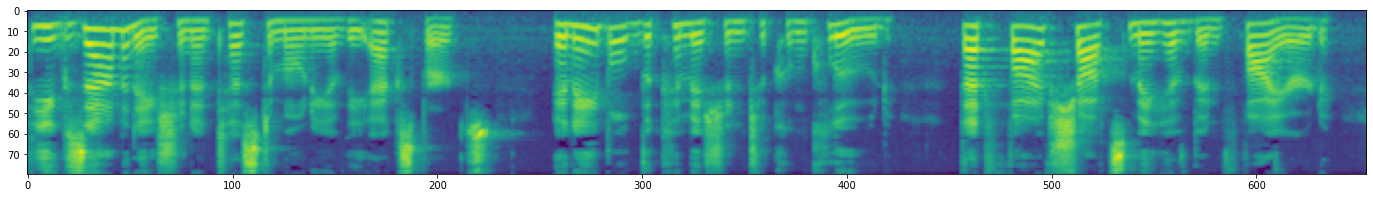

In [58]:
# each thing on the x axis is 256 samples
figsize(24,24)
imshow(10*np.log10(mel_specgram[0]))
#imshow(mel_specgram[0])

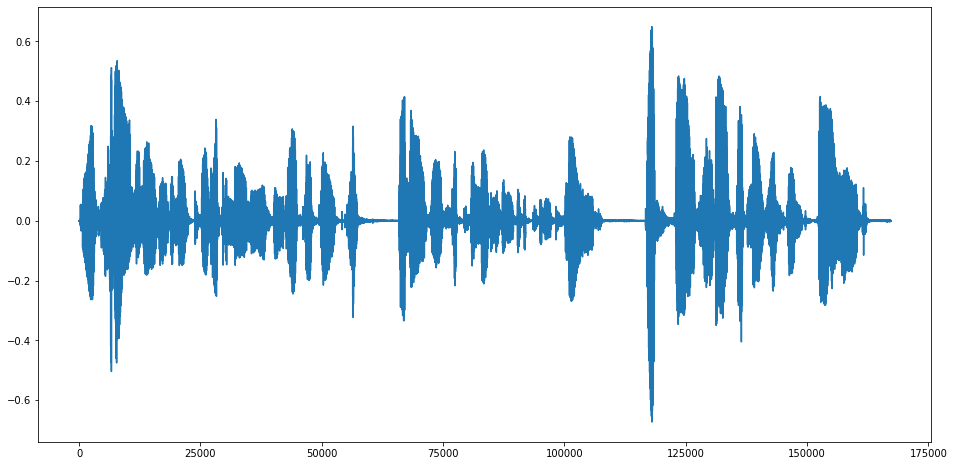

In [56]:
figsize(16,8)
plot(waveform[0])

In [10]:
import torch
from rec import LJSpeech
batch_size = 8
dset = torch.utils.data.DataLoader(LJSpeech(), batch_size=batch_size, shuffle=True, num_workers=2)

In [12]:
next(iter(dset))

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/batman/.pyenv/versions/3.8.10/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 287, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/batman/.pyenv/versions/3.8.10/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    return self.collate_fn(data)
  File "/home/batman/.pyenv/versions/3.8.10/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py", line 84, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/home/batman/.pyenv/versions/3.8.10/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py", line 84, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/home/batman/.pyenv/versions/3.8.10/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py", line 56, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: stack expects each tensor to be equal size, but got [1, 80, 515] at entry 0 and [1, 80, 508] at entry 1
